## **Analisis Kinerja Komparatif GPT-4.1 dan Gemini 2.5 Flash Menggunakan Kerangka Evaluasi Multi-Metrik untuk Katalogisasi E-commerce**
---
<br>
Nama: Muhammad Khuirul Huda

NIM: 2304130046


### Model

[GPT 4.1](https://github.com/marketplace/models/azure-openai/gpt-4-1)

[Gemini 2.5 Flash Preview 05-20](https://aistudio.google.com/u/2/prompts/new_chat)

### Credit
Foto produk sampel: https://www.lazada.co.id/products/nipis-madu-lime-soda-botol-330-ml-i7323486080.html


> Hanya kode untuk perhitungan metrik evaluasi dan prompting saja yang digenerate AI Gemini 2.5 Pro, selain itu sepenuhnya ditulis dengan memperhatikan contoh dan dokumentasi dari: https://googleapis.github.io/python-genai/ https://ai.google.dev/gemini-api/docs/image-understanding https://learn.microsoft.com/en-us/python/api/overview/azure/ai-inference-readme?view=azure-python-preview

In [ ]:
! pip install azure-ai-inference
! pip install google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.4/207.4 kB 9.7 MB/s eta 0:00:00


In [ ]:
! wget https://id-test-11.slatic.net/p/2a53e5378be3668220b973f67ad91f9e.png -O sample1.png

--2025-06-11 08:04:23--  https://id-test-11.slatic.net/p/2a53e5378be3668220b973f67ad91f9e.png
Resolving id-test-11.slatic.net (id-test-11.slatic.net)... 172.96.115.243, 172.96.115.245, 109.61.92.193, ...
Connecting to id-test-11.slatic.net (id-test-11.slatic.net)|172.96.115.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 342701 (335K) [image/png]
Saving to: ‘sample1.png’

sample1.png         100%[===================>] 334.67K   267KB/s    in 1.3s    

2025-06-11 08:04:26 (267 KB/s) - ‘sample1.png’ saved [342701/342701]



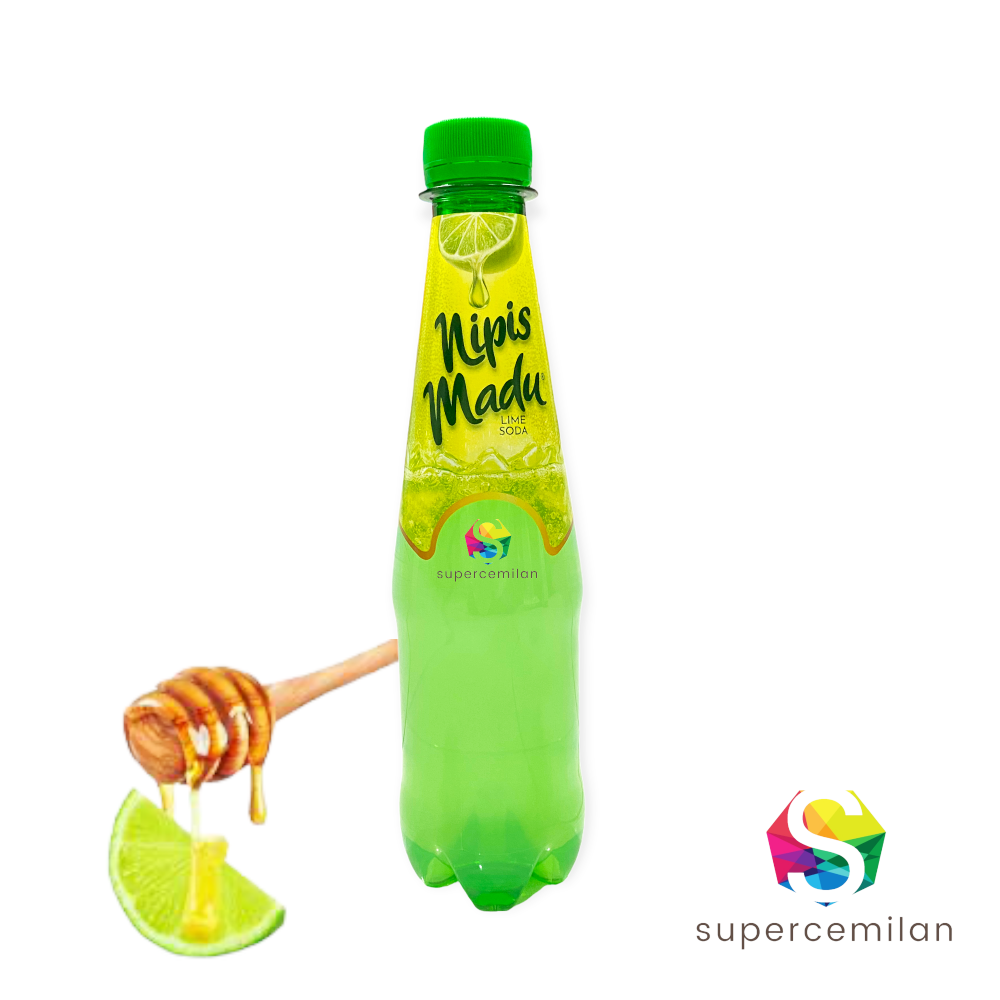

In [ ]:
from IPython.display import Image
Image('sample1.png', width=300)

In [ ]:
from google.colab import userdata

In [ ]:
base_prompt = """
# PERAN DAN TUJUAN
Anda adalah seorang ahli katalogisasi e-commerce dan spesialis SEO dengan pengalaman 10 tahun. Tugas Anda adalah menganalisis gambar produk dan menghasilkan metadata yang akurat, lengkap, dan dioptimalkan untuk mesin pencari.

# KONTEKS
Metadata ini akan digunakan secara langsung di platform e-commerce besar. Akurasi kategori dan tag sangat penting untuk filter pencarian, sementara deskripsi harus persuasif dan SEO-friendly untuk meningkatkan peringkat di Google dan mendorong penjualan.

# INSTRUKSI TUGAS
Berdasarkan gambar produk yang akan saya berikan, generate informasi produk dengan mengikuti semua aturan di bawah ini.

# ATURAN & BATASAN
1.  **product_name:**
    - Buat nama produk yang jelas dan deskriptif, namun tidak terlalu panjang (maksimal 70 karakter).
    - Sertakan merek jika dapat diidentifikasi.
    - Format: [Jenis Produk] [Merek (jika ada)] [Atribut Utama] - [Warna/Fitur Kunci]

2.  **tags:**
    - Buat sebuah array berisi tag yang relevan.
    - Sertakan kata kunci umum, kata kunci spesifik (long-tail), dan atribut produk.
    - Semua tag harus dalam format huruf kecil (lowercase).

3.  **category_suggestion:**
    - Berikan 1 (satu) sugesti kategori produk yang paling akurat.
    - Gunakan format breadcrumb, contoh: "Fashion Pria > Sepatu > Sneakers".

4.  **seo_description:**
    - Tulis deskripsi produk yang SEO-friendly dengan panjang 150-200 kata.
    - Deskripsi harus persuasif, menonjolkan manfaat dan fitur utama produk.
    - Secara alami, masukkan 2-3 kata kunci dari daftar tag ke dalam kalimat.
    - Akhiri dengan sebuah kalimat ajakan untuk bertindak (call-to-action).

# FORMAT OUTPUT
Format output HARUS dalam bentuk JSON yang valid tanpa teks pembuka atau penutup lainnya. Gunakan struktur berikut:
{
  "product_name": "string",
  "tags": ["string"],
  "category_suggestion": "string",
  "seo_description": "string"
}

# BAHASA output
bahasa output harus dalam bahasa inggris
"""

In [ ]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import (
    TextContentItem,
    ImageContentItem,
    ImageUrl,
    ImageDetailLevel,
    UserMessage,
    SystemMessage
)
from azure.core.credentials import AzureKeyCredential

endpoint = "https://models.github.ai/inference"
model = "openai/gpt-4.1"
token = userdata.get('GITHUB_TOKEN')

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)

response = client.complete(
    messages=[

        UserMessage(
             [
                    TextContentItem(text=base_prompt),
                    ImageContentItem(
                        image_url=ImageUrl.load(
                            image_file="sample1.png",
                            image_format="png",
                            detail=ImageDetailLevel.HIGH,
                        ),
                    ),
                ],
        ),
    ],
    temperature=1.0,
    top_p=1.0,
    model=model
)


response_gpt = response.choices[0].message.content
print(response_gpt)

{
  "product_name": "Lime Honey Soda Supercemilan - Refreshing Citrus Honey Drink",
  "tags": [
    "lime honey soda",
    "supercemilan",
    "refreshing drink",
    "citrus beverage",
    "honey soda",
    "lime drink",
    "carbonated beverage",
    "tropical soda",
    "sweet sparkling drink",
    "unique soda flavor"
  ],
  "category_suggestion": "Food & Beverage > Drinks > Soft Drinks",
  "seo_description": "Experience true refreshment with Lime Honey Soda by Supercemilan, a unique carbonated beverage blending the tangy zest of fresh lime and the natural sweetness of honey. This citrus beverage is perfect for those who crave a distinctive drink that balances sour and sweet notes for a delightful taste sensation. The honey soda formula provides a smooth, lightly sparkling texture, making it ideal for cooling down on a hot day or complementing your favorite snacks. Crafted with quality ingredients, Lime Honey Soda is a healthier and tastier alternative to regular soft drinks. Don't

In [ ]:
import base64
import os
from google import genai
from google.genai import types


def generate():
    client = genai.Client(
        api_key=userdata.get("GEMINI_API_KEY"),
    )
    with open('sample1.png', 'rb') as f:
      image_bytes = f.read()

    model = "gemini-2.5-flash-preview-05-20"
    response = client.models.generate_content(
    model=model,
    contents=[
      types.Part.from_bytes(
        data=image_bytes,
        mime_type='image/jpeg',
    ),
    base_prompt
    ]
  )
    return response.text


if __name__ == '__main__':
    response_gemini = generate()
    print(response_gemini)




```json
{
  "product_name": "Nipis Madu Lime Honey Soda - Refreshing Green Drink",
  "tags": [
    "nipis madu",
    "lime soda",
    "honey soda",
    "carbonated drink",
    "soft drink",
    "beverage",
    "refreshing drink",
    "lime honey flavor",
    "green bottle",
    "sweet drink",
    "indonesian soda"
  ],
  "category_suggestion": "Food & Beverages > Drinks > Carbonated Drinks & Sodas",
  "seo_description": "Experience a unique burst of flavor with Nipis Madu Lime Honey Soda, a truly refreshing drink that masterfully combines the zesty tang of fresh lime with the sweet richness of natural honey. This delightful carbonated beverage offers a perfect and harmonious balance, making it an ideal choice for quenching your thirst on a hot day or simply enjoying a moment of pure refreshment. Encased in a vibrant green bottle, this soda hints at the natural, invigorating taste awaiting inside. Nipis Madu Lime Honey Soda is more than just a soft drink; it's an exciting fusion designe

In [ ]:
response_gemini = response_gemini.replace("```", '').replace("json", '')
print(response_gemini)

{
  "product_name": "Nipis Madu Lime Honey Soda - Refreshing Green Drink",
  "tags": [
    "nipis madu",
    "lime soda",
    "honey soda",
    "carbonated drink",
    "soft drink",
    "beverage",
    "refreshing drink",
    "lime honey flavor",
    "green bottle",
    "sweet drink",
    "indonesian soda"
  ],
  "category_suggestion": "Food & Beverages > Drinks > Carbonated Drinks & Sodas",
  "seo_description": "Experience a unique burst of flavor with Nipis Madu Lime Honey Soda, a truly refreshing drink that masterfully combines the zesty tang of fresh lime with the sweet richness of natural honey. This delightful carbonated beverage offers a perfect and harmonious balance, making it an ideal choice for quenching your thirst on a hot day or simply enjoying a moment of pure refreshment. Encased in a vibrant green bottle, this soda hints at the natural, invigorating taste awaiting inside. Nipis Madu Lime Honey Soda is more than just a soft drink; it's an exciting fusion designed to tan

In [ ]:
!pip install textstat
!pip install vaderSentiment
!apt-get install openjdk-17-jre-headless -qq > /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"

!pip install language-tool-python
import json
import pandas as pd
import textstat
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import language_tool_python

In [ ]:


# Inisialisasi tool yang akan digunakan kembali
# Tool ini butuh koneksi internet pada saat pertama kali dijalankan
try:
    grammar_tool = language_tool_python.LanguageTool('en-US')
    sentiment_analyzer = SentimentIntensityAnalyzer()
    print("Inisialisasi tool berhasil.")
except Exception as e:
    print(f"Gagal menginisialisasi tool, pastikan Java terinstal dan ada koneksi internet. Error: {e}")
    grammar_tool = None
    sentiment_analyzer = None

def _analisis_tunggal(data_json):
    """Fungsi internal untuk menganalisis satu objek JSON."""
    if not isinstance(data_json, dict):
        raise TypeError("Input harus berupa dictionary Python (hasil dari json.loads)")

    # Ekstrak data
    name = data_json.get("product_name", "")
    tags = data_json.get("tags", [])
    category = data_json.get("category_suggestion", "")
    desc = data_json.get("seo_description", "")

    # 1. Metrik Kuantitatif Dasar
    metrics = {
        "Nama (Jumlah Karakter)": len(name),
        "Nama (Jumlah Kata)": len(name.split()),
        "Jumlah Tag": len(tags),
        "Kategori (Kedalaman)": category.count('>') + 1 if category else 0,
        "Deskripsi (Jumlah Kata)": len(desc.split()),
        "Deskripsi (Jumlah Kalimat)": textstat.sentence_count(desc),
    }

    # 2. Metrik Kualitas Teks & Keterbacaan
    if desc:
        # Rata-rata kata per kalimat
        metrics["Deskripsi (Rata-rata Kata/Kalimat)"] = metrics["Deskripsi (Jumlah Kata)"] / metrics["Deskripsi (Jumlah Kalimat)"]

        # Readability (menggunakan standar en_US sebagai proxy komparatif)
        textstat.set_lang('en_US')
        metrics["Keterbacaan (Flesch Ease)"] = textstat.flesch_reading_ease(desc)
        metrics["Keterbacaan (Grade Level)"] = textstat.flesch_kincaid_grade(desc)

        # Keragaman Leksikal (TTR)
        tokens = [word.lower() for word in desc.split()]
        if len(tokens) > 0:
            unique_tokens = len(set(tokens))
            metrics["Keragaman Leksikal (TTR)"] = unique_tokens / len(tokens)
        else:
            metrics["Keragaman Leksikal (TTR)"] = 0

        # Analisis Sentimen (jika tool tersedia)
        if sentiment_analyzer:
            sentiment_score = sentiment_analyzer.polarity_scores(desc)
            metrics["Sentimen (Skor Compound)"] = sentiment_score['compound']
        else:
            metrics["Sentimen (Skor Compound)"] = "N/A"

        # Cek Gramatikal (jika tool tersedia)
        if grammar_tool:
            matches = grammar_tool.check(desc)
            metrics["Jumlah Kesalahan Gramatikal"] = len(matches)
        else:
            metrics["Jumlah Kesalahan Gramatikal"] = "N/A"

    return metrics

def analisis_komparatif_json(json1, json2, nama_model1="GPT-4.1", nama_model2="Gemini 2.5 Flash"):
    """
    Menganalisis dan membandingkan dua output JSON dari model AI.

    Args:
        json1 (dict): Output JSON pertama dalam bentuk dictionary.
        json2 (dict): Output JSON kedua dalam bentuk dictionary.
        nama_model1 (str): Nama untuk model pertama.
        nama_model2 (str): Nama untuk model kedua.

    Returns:
        pandas.DataFrame: Tabel perbandingan hasil analisis.
    """
    # Analisis masing-masing JSON
    hasil1 = _analisis_tunggal(json1)
    hasil1['Model'] = nama_model1

    hasil2 = _analisis_tunggal(json2)
    hasil2['Model'] = nama_model2

    # Metrik Komparatif
    tags1 = set(json1.get("tags", []))
    tags2 = set(json2.get("tags", []))
    tag_overlap = len(tags1.intersection(tags2))

    hasil1['Tag (Jumlah Sama)'] = tag_overlap
    hasil2['Tag (Jumlah Sama)'] = tag_overlap

    # Buat DataFrame untuk perbandingan
    df = pd.DataFrame([hasil1, hasil2])
    df = df.set_index('Model')

    # Mengatur urutan kolom agar lebih rapi
    urutan_kolom = [
        'Nama (Jumlah Karakter)', 'Nama (Jumlah Kata)', 'Jumlah Tag', 'Tag (Jumlah Sama)',
        'Kategori (Kedalaman)', 'Deskripsi (Jumlah Kata)', 'Deskripsi (Jumlah Kalimat)',
        'Deskripsi (Rata-rata Kata/Kalimat)', 'Keterbacaan (Flesch Ease)',
        'Keterbacaan (Grade Level)', 'Keragaman Leksikal (TTR)',
        'Sentimen (Skor Compound)', 'Jumlah Kesalahan Gramatikal'
    ]

    return df[urutan_kolom].T.round(2) # .T untuk transpose (membalik baris dan kolom)


# --- CONTOH PENGGUNAAN ---
if __name__ == "__main__":


    # 2. Konversi string JSON menjadi dictionary Python
    data1 = json.loads(response_gpt)
    data2 = json.loads(response_gemini)

    # 3. Jalankan fungsi analisis
    if grammar_tool and sentiment_analyzer:
        tabel_perbandingan = analisis_komparatif_json(data1, data2)

        # 4. Tampilkan hasilnya
        print("\n--- Tabel Hasil Analisis Komparatif ---")
        print(tabel_perbandingan)

Inisialisasi tool berhasil.

--- Tabel Hasil Analisis Komparatif ---
Model                               GPT-4.1  Gemini 2.5 Flash
Nama (Jumlah Karakter)                60.00             51.00
Nama (Jumlah Kata)                     9.00              9.00
Jumlah Tag                            10.00             11.00
Tag (Jumlah Sama)                      2.00              2.00
Kategori (Kedalaman)                   3.00              3.00
Deskripsi (Jumlah Kata)              109.00            189.00
Deskripsi (Jumlah Kalimat)             5.00              9.00
Deskripsi (Rata-rata Kata/Kalimat)    21.80             21.00
Keterbacaan (Flesch Ease)             41.90             43.18
Keterbacaan (Grade Level)             12.83             12.45
Keragaman Leksikal (TTR)               0.75              0.68
Sentimen (Skor Compound)               0.99              1.00
Jumlah Kesalahan Gramatikal            1.00              6.00
